In [1]:
import pandas as pd


In [38]:
cols = "age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income".split(', ')
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names = cols)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## normality test

In [39]:
from scipy.stats import normaltest
k2, p = normaltest(data['age'])

print(k2,p)
if p < 0.001 : print('not normal')
else: print('normal')

1526.0108462557214 0.0
not normal


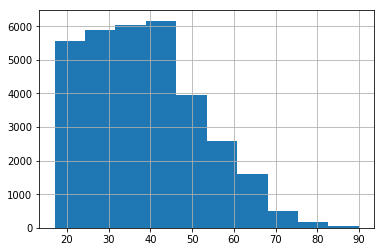

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
data['age'].hist()
plt.show()

## correlation check

In [41]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

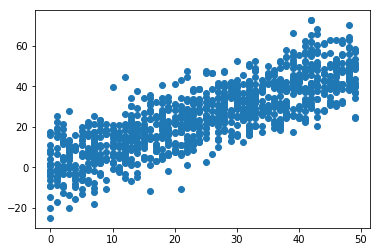

In [42]:
plt.scatter(x, y)
plt.show()

In [50]:
adata =data[['age','education-num','capital-gain']]
adata.corr()

,age,education-num,capital-gain
age,1.000000,0.036527,0.077674
education-num,0.036527,1.000000,0.122630
capital-gain,0.077674,0.122630,1.000000


In [44]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

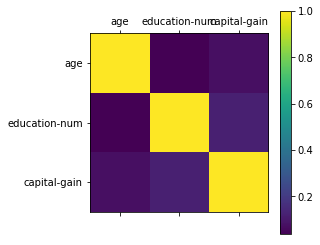

In [45]:
plt.matshow(adata.corr())
plt.xticks(range(len(adata.columns)), adata.columns)
plt.yticks(range(len(adata.columns)), adata.columns)
plt.colorbar()
plt.show()

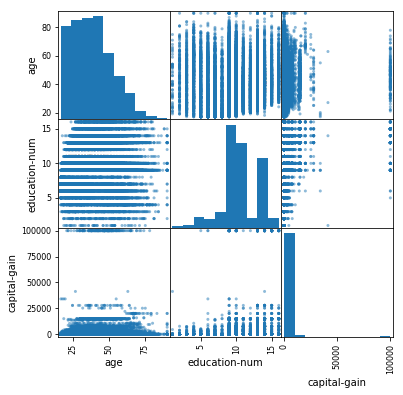

In [49]:
pd.plotting.scatter_matrix(adata, figsize=(6, 6))
plt.show()

## Proportion test